来源：https://tensorflow.google.cn/tutorials/eager/custom_training

In [1]:
%config IPCompleter.greedy=True

In [2]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe

In [3]:
tf.contrib.eager.Variable

tensorflow.python.ops.resource_variable_ops.ResourceVariable

In [4]:
# tf.enable_eager_execution()
tf.contrib.eager.enable_eager_execution()

## 示例：拟合线性模型

### 定义模型

In [5]:
class my_model(object):
    def __init__(self):
        self.W=tfe.Variable(5.0)
        self.b=tfe.Variable(2.0)
        
    def __call__(self,x):
        return self.W*x+self.b
        

In [6]:
model = my_model()

model(3.0).numpy()

17.0

### 定义损失

In [7]:
def loss(y_p,y_true):
    return tf.reduce_mean(tf.square(y_p-y_true))

### 训练循环

In [8]:
def training(model,inputs,outputs,d_rate):
#     梯度功效
    with tf.GradientTape() as t:
        predicted_y = model(inputs);
        loss_value = loss(predicted_y,outputs)
    dW,db=t.gradient(loss_value,[model.W,model.b])
    
#     优化器功效
    model.W.assign_sub(dW*d_rate)
    model.b.assign_sub(db*d_rate)

### 准备训练数据

In [17]:
learn_rate=0.03
true_W = 4
true_b = 3
example_num = 50000


inputs = tf.random_normal([example_num])
noises = tf.random_normal([example_num])
outputs = inputs*true_W + true_b + noises 
print(inputs[:5])
print(noises[:5])
print(outputs[:5])

tf.Tensor([-1.0854899   0.01737946 -0.4367594  -1.494014   -0.32680106], shape=(5,), dtype=float32)
tf.Tensor([ 1.014084   -0.03612947 -0.2234342   1.599189    0.28270674], shape=(5,), dtype=float32)
tf.Tensor([-0.3278755  3.0333884  1.0295281 -1.376867   1.9755025], shape=(5,), dtype=float32)


### 开始训练

In [18]:
collect_ws,collect_bs=[],[]
epochs = range(100)
model=my_model()
for _ in epochs:
    collect_ws.append(model.W.numpy())
    collect_bs.append(model.b.numpy())
    training(model,inputs,outputs,learn_rate);

数据可视化

In [13]:
import matplotlib.pyplot as plt

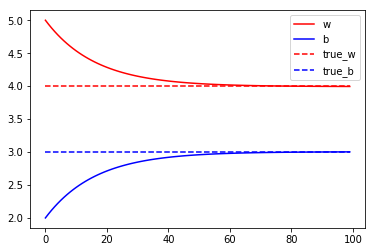

In [19]:
plt.plot(epochs,collect_ws,'r',
        epochs,collect_bs,'b')
plt.plot([true_W]*len(epochs),'r--',
        [true_b]*len(epochs),'b--')
plt.legend(['w','b','true_w','true_b'])
plt.show()

## 总结
该教程介绍了`Variables`，并使用到目前为止讨论的__TensorFlow原语__构建并训练了一个简单的线性模型

从理论上讲，这几乎是使用TensorFlow进行机器学习研究所需要的全部内容